In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_file = 'Prueba3.csv'
df = pd.read_csv(csv_file, header=None, skiprows=3, skipfooter=1, engine='python')
#df.drop(df.columns[2], axis=1, inplace=True)  # Drop the first column
df.columns = ['Time', 'Value']  # Rename columns
df["Time"]=df["Time"]  # Normalize time to start from 0
print(df)


        Time  Value
0      98626      0
1      98636      0
2      98647      0
3      98657      0
4      98667      0
...      ...    ...
1602  115237      1
1603  115248      1
1604  115258      0
1605  115268      1
1606  115278      0

[1607 rows x 2 columns]


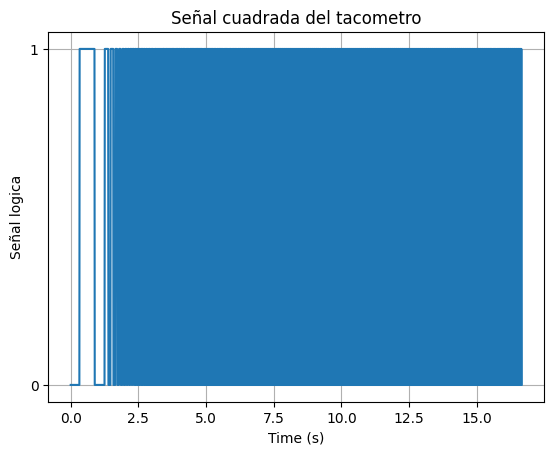

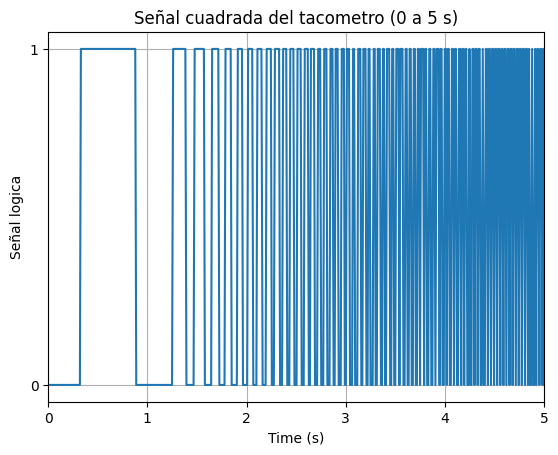

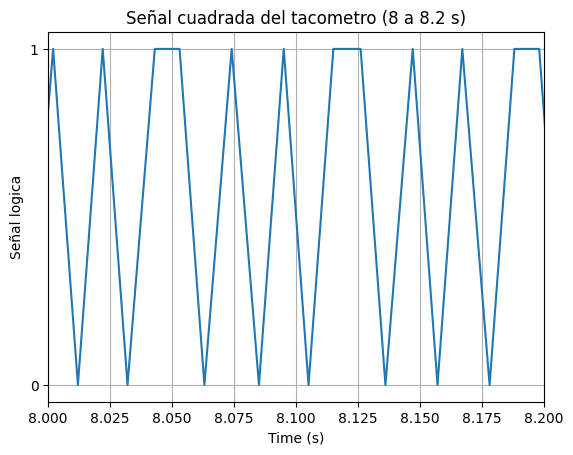

In [106]:
plt.plot((df["Time"]-min(df["Time"]))/1000, df["Value"], label='Value')
plt.xlabel('Time (s)')
plt.ylabel('Señal logica')
plt.title('Señal cuadrada del tacometro')
plt.yticks(np.array([0,1])) 
plt.grid()
plt.show()

plt.plot((df["Time"]-min(df["Time"]))/1000, df["Value"], label='Value')
plt.xlabel('Time (s)')
plt.ylabel('Señal logica')
plt.title('Señal cuadrada del tacometro (0 a 5 s)')
plt.xlim(0, 5)  # Set x-axis limits
plt.yticks(np.array([0,1]))  # Set y-ticks
plt.grid()
plt.show()


plt.plot((df["Time"]-min(df["Time"]))/1000, df["Value"], label='Value')
plt.xlabel('Time (s)')
plt.ylabel('Señal logica')
plt.yticks(np.array([0,1]))  # Set y-ticks
plt.title('Señal cuadrada del tacometro (8 a 8.2 s)')
plt.xlim(8, 8.2)  # Set x-axis limits
plt.grid()
plt.show()


(0.0, 16.652)

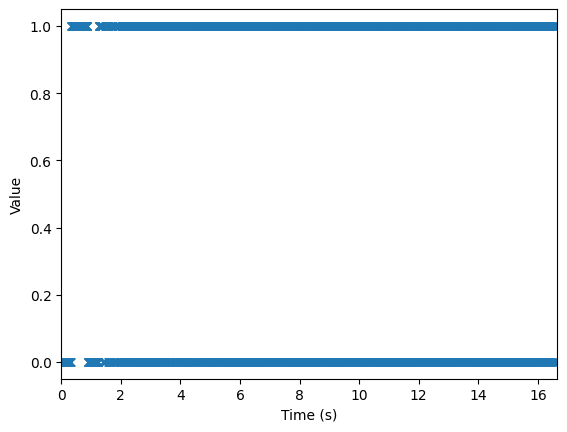

In [79]:
Time=df["Time"].values-df["Time"].values[0]
Time=Time/1000
Value=df["Value"].values
plt.plot(Time, Value,"x")
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.xlim(0, Time.max())   

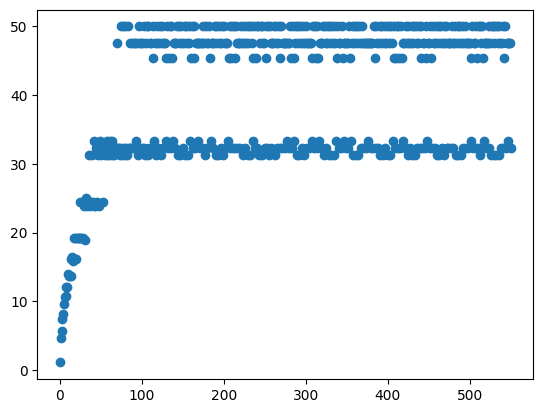

In [80]:

def frecuencia_vs_tiempo(tiempo, senal):
    """
    Calcula la frecuencia instantánea a partir de una señal digital.

    Parámetros:
    - tiempo: array-like de tiempos (en segundos o milisegundos)
    - senal: array-like con valores binarios (0/1)

    Retorna:
    - t_frec: tiempos asociados a la frecuencia calculada
    - frec: frecuencia estimada (Hz)
    """
    tiempo = np.asarray(tiempo)
    senal = np.asarray(senal)

    # Detectar flancos ascendentes (0 -> 1)
    flancos = np.where((senal[1:] > senal[:-1]))[0] + 1

    t_flancos = tiempo[flancos]
    dt = np.diff(t_flancos)

    # Frecuencia = 1 / periodo
    frec = 1 / dt
    t_frec = t_flancos[:-1] + dt / 2  # tiempo medio entre flancos

    return t_frec, frec


t_frec, frec = frecuencia_vs_tiempo(Time, Value)

plt.plot(frec, "o")


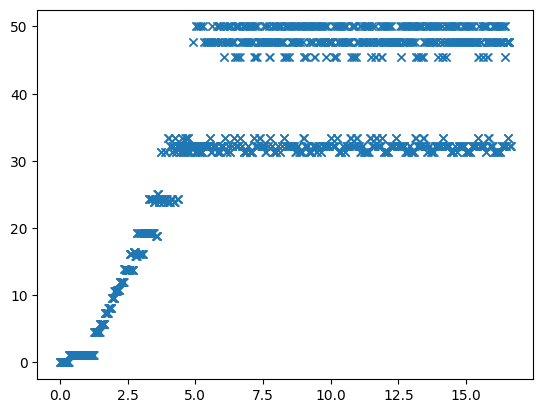

In [81]:
def frecuencia_en_todo_tiempo(tiempo, senal):
    """
    Calcula un vector de frecuencia con la misma longitud que 'tiempo'.

    Para cada instante, asigna la frecuencia correspondiente al último flanco detectado.

    Parámetros:
    - tiempo: array-like con tiempos (s o ms)
    - senal: array-like con valores binarios (0 o 1)

    Retorna:
    - frecuencia_full: array con frecuencia estimada en cada instante de tiempo
    """
    tiempo = np.asarray(tiempo)
    senal = np.asarray(senal)

    # Detectar flancos ascendentes
    flancos = np.where((senal[1:] > senal[:-1]))[0] + 1
    t_flancos = tiempo[flancos]
    dt = np.diff(t_flancos)
    frec = 1 / dt  # Frecuencia entre flancos

    # Crear vector de frecuencias de misma longitud que tiempo
    frecuencia_full = np.zeros_like(tiempo)

    # Asignar frecuencia a cada intervalo entre flancos
    for i in range(len(dt)):
        mask = (tiempo >= t_flancos[i]) & (tiempo < t_flancos[i+1])
        frecuencia_full[mask] = frec[i]

    # Asignar frecuencia después del último flanco (si se desea mantener constante)
    if len(dt) > 0:
        frecuencia_full[tiempo >= t_flancos[-1]] = frec[-1]

    return frecuencia_full

frec= frecuencia_en_todo_tiempo(Time, Value)
for i in range(len(frec)):
    if frec[i] < 0 or Time[i] < 0:
        frec[i] = frec[i-1]
        Time[i] = Time[i-1]


plt.plot(Time,frec, "x")

#export to csv
df_frec = pd.DataFrame({'Time': Time, 'Frequency': frec})
df_frec.to_csv('frecuencia.csv', index=False)


<>:12: SyntaxWarning: invalid escape sequence '\o'
<>:12: SyntaxWarning: invalid escape sequence '\o'
C:\Users\nicoa\AppData\Local\Temp\ipykernel_14812\2120754964.py:12: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('$\omega$ (rad/s)')
C:\Users\nicoa\AppData\Local\Temp\ipykernel_14812\2120754964.py:2: RankWarning: Polyfit may be poorly conditioned
  P=np.polyfit(Time, omega, 30)


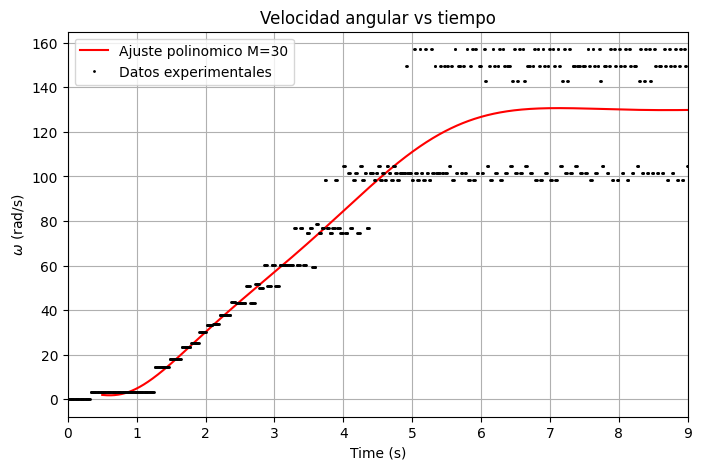

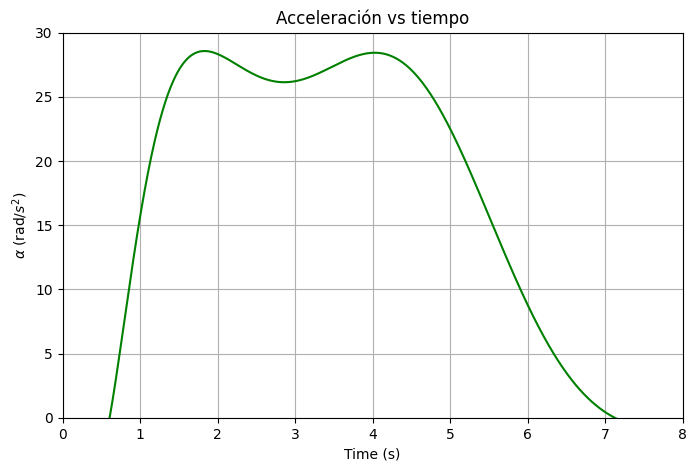

In [108]:
omega=np.pi*frec # Convertir a rad/s ojo frecuencia se divide en 2 por el numero de stickers
P=np.polyfit(Time, omega, 30)
x = np.linspace(0.5, 9, 1000)
y = np.polyval(P, x)

plt.figure(figsize=(8, 5))
plt.title('Velocidad angular vs tiempo')
plt.plot(x, y, label='Ajuste polinomico M=30', color='red')
plt.plot(Time, omega, ".", label='Datos experimentales', color='Black',markersize=2)
plt.xlim(0, 9)
plt.xlabel('Time (s)')
plt.ylabel('$\omega$ (rad/s)')
plt.grid()
plt.legend()
plt.show()

Poly=np.poly(P)
Dp=np.polyder(P)
dy = np.polyval(Dp, x)

plt.figure(figsize=(8, 5))
plt.plot(x, dy, label='Derivative of Polynomial', color='green')
plt.xlabel('Time (s)')
plt.ylabel(r'$\alpha$ (rad$/s^2$)')
plt.title('Acceleración vs tiempo')
plt.xlim(0, 8)
plt.ylim(0,30)
plt.grid()
plt.show()

<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
C:\Users\nicoa\AppData\Local\Temp\ipykernel_14812\3486378607.py:24: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('$\omega$ (rad/s)')


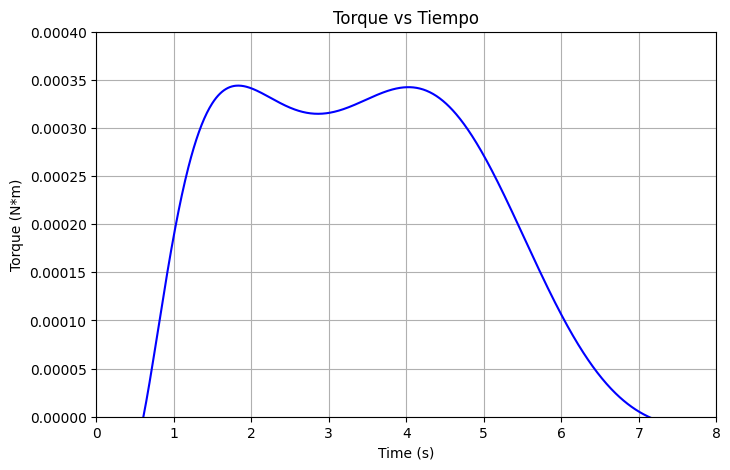

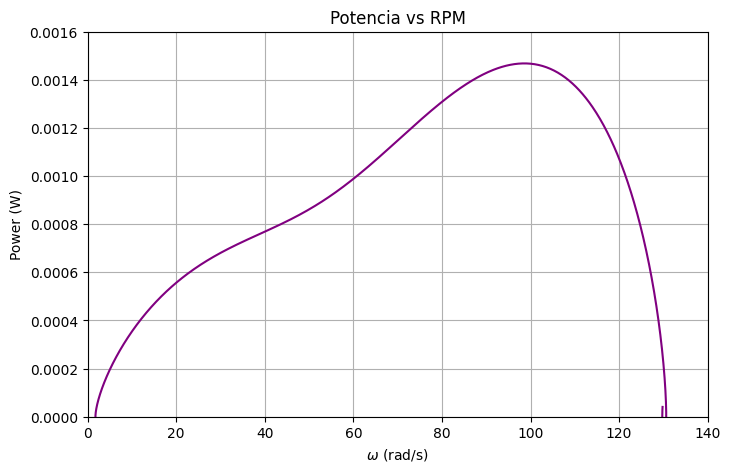

In [102]:
J=1e-5 # kg*m^2
J = 7.36e-6 +  1.499e-6 +  3.18e-6   
T=J*dy # Torque
P_tur=T*x # Power
R_eje = 2.5e-3        # radio del eje
m_tur = 10e-3 + 4e-3 + 11e-3        # masa de la turbina
K_f = 1            # factor de fricción
T_corregido=T+K_f*m_tur*9.81*R_eje 
P_tur_corregido=T_corregido*x # Power

plt.figure(figsize=(8, 5))
plt.title('Torque vs Tiempo')
plt.plot(x, T, label='Torque', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Torque (N*m)')
plt.ylim(0, 4e-4)
plt.xlim(0, 8)
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
plt.title('Potencia vs RPM')
plt.plot(y, P_tur,label='Power', color='purple')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('Power (W)')
plt.xlim(0, 140)
plt.ylim(0, 0.00160)
plt.grid()
plt.show()

1247.5840077924292
Reynolds number: 9491.666666666666


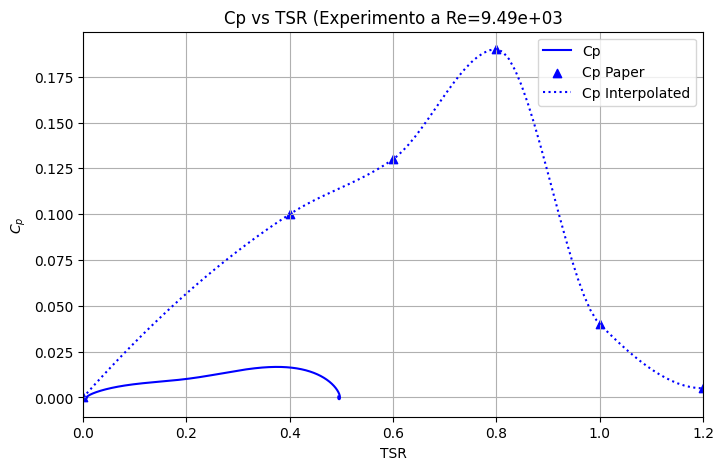

In [84]:
from scipy.interpolate import PchipInterpolator
Cp_paper = np.flip([0.005, 0.04, 0.19, 0.13, 0.1, 0])
TSR_points = np.flip([1.2, 1, 0.8, 0.6, 0.4, 0])
Cp_interp = PchipInterpolator(TSR_points, Cp_paper)
xq = np.linspace(0, 1.2, 100)
Cp_continuo = Cp_interp(xq)

R_tur=51e-3/2
V_air=7.59 #m/s
V_air=6.7
TSR_exp=y*R_tur/V_air
rho_air=0.9 # kg/m^3

Cp=P_tur/((1/2)*V_air**3*rho_air*R_tur**2)
Cp_corregido=P_tur_corregido/((1/2)*V_air**3*rho_air*R_tur**2)
print(max(y)*60/(2*np.pi)) # RPM


Re=V_air*R_tur/1.8e-5
print("Reynolds number:", Re)

plt.figure(figsize=(8, 5))
plt.title('Cp vs TSR (Experimento a Re='+ format(Re, '.2e'))
plt.plot(TSR_exp, Cp, label='Cp', color='blue')
plt.scatter(TSR_points, Cp_paper, label='Cp Paper', color='blue',marker='^')
#plt.plot(TSR_exp, Cp_corregido, label='Cp Corrected', color='orang')
plt.plot(xq, Cp_continuo,":" ,label='Cp Interpolated',color='blue')
plt.xlabel('TSR')
plt.ylabel('$C_p$')
plt.xlim(0, 1.2)
plt.legend()
plt.grid()
plt.show()

